In [15]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [20]:
metrics_list=[]
metrics_list=[pd.read_csv(infile).drop('Unnamed: 0',axis=1) for infile in glob.glob('../Streamlit/*_metrics.csv')]
metrics=pd.DataFrame()
metrics=pd.concat(metrics_list,axis=0).sort_values(by=['model']).drop_duplicates().reset_index().drop('index',axis=1)

In [21]:
metrics

,model,score,mean_absolute_error,mean_squared_error,RMSE
0,LR,0.321114,4.877155,3.286192e+01,5.732531
1,LR_accum,0.812443,364844.360508,2.070682e+11,455047.457275
2,SVR,0.300746,4.030486,2.264935e+01,4.759133
3,SVR_accum,0.742399,307218.410316,1.457470e+11,381768.243739


In [22]:
metrics.to_csv('../Streamlit/ML_global_metrics.csv')

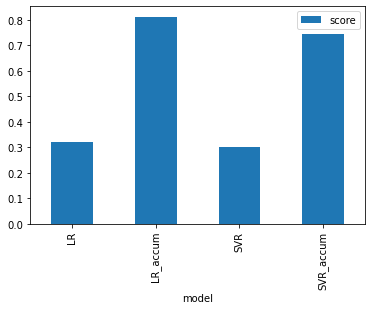

In [24]:
glob_metrics=metrics.copy()

score_chart=glob_metrics.plot.bar(x='model', y='score')
plt.show(score_chart)

[Text(0.2, 0, 'LR_accum'), Text(1.2, 0, 'SVR_accum')]

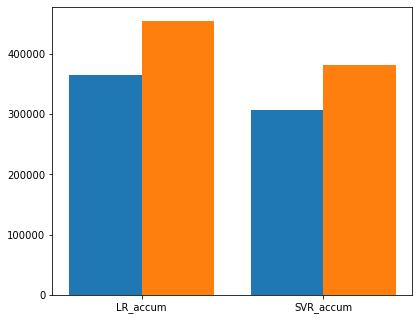

In [59]:
good_models=glob_metrics.loc[[1, 3]].drop(['score','mean_squared_error'],axis=1)
idx = np.asarray([i for i in range(len(good_models['model']))])
width=0.4
fig_2 = plt.figure(figsize = (5,4))
ax_2 = fig_2.add_axes([0,0,1,1])
ax_2.bar(idx, good_models['mean_absolute_error'],width = width)
ax_2.bar(idx+width, good_models['RMSE'],width = width)
ax_2.set_xticks(idx+width/2)
ax_2.set_xticklabels(good_models['model'])#, rotation=65)